# Hobo Data, Student Version

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
import cv2
import numpy as np


We'll have three groups working on different parts of the [HOBO data](https://sites.google.com/lcps.org/hobosensordatabase/home) (described below). 

* Group 1 will extract sensor coordinates from a satellite image screenshot. You will produce a funtion that returns screen cooriadte for x,y pairs as in:
	*  pos("A","30") = 143,299
* Group two will ingest and clean the all the relevant data and store it in arrays indexed by <x,y,t> (horizontal, vertical, time, so that a user can query
	* "A, 30, 01/27/2022 17:28:08" and return the reading -0.95	34.40
* Group 3 will explor 3D plots in matplot lib specifically contour and surface plots, and then animate the plots as parameters change. You can start with variants of $y = e^{-x^2} \sin(t)$ and $z =4 \sin (t) e^{-x^2-y^2} \cos \left(4 x^2+4 y^2\right)$

## Part 1: Extracting Coordinates

There's some data being collected [here](https://sites.google.com/lcps.org/hobosensordatabase/home) Read about the hobo data first. Then identify the data for the "red" grid of sensors for ACL. in part 1 you will approximate the coordinates of these sensors by analyzing a screenshot. You're using the openCV library "cv2" which should be installed in this environment. 

In [3]:
rawpic = cv2.imread("data/red_sensor_image.png", cv2.IMREAD_COLOR)

Find the shape and then select a submatrix that is square but doesn't cut off any data

In [4]:
rawpic.shape

(730, 750, 3)

In [5]:
pic = rawpic[:750,50:700,:]
pic.shape

(730, 650, 3)

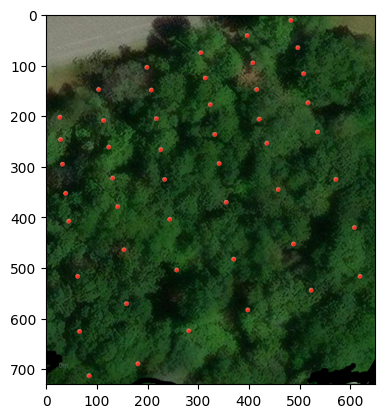

In [6]:
picrgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(picrgb)

Convert the image from BGR to RGB (openCV uses a different ordering of color data) and then display. Use the commands `cv2.cvtColor` and `plt.imshow()`

To find the red dots, we choose to analyse just the red layer of pixel information. Split the image into RGB channels using `cv2.split` and dislay the red channel only, as grayscale.



You see the red pixels are nearly white and the background is nearly black. We want to crush this image into 0s and 255s for black and white, so the red dots really pop. Use matplotlib filtering syntax (much like pandas filtering). Any pixel with a red above 200 should become 255. Anything below should be 0. (Be sure to **copy** your red matrix first in case you mess up.)

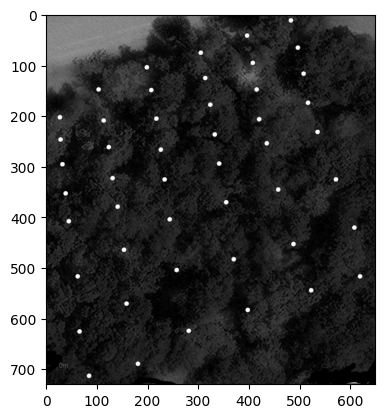

In [7]:
## print the red matrix here as a sanity check
# and its size
b, g, r= cv2.split(pic)
rshape = np.shape(r)
r, rshape
plt.imshow(r, cmap='gray')

In [8]:
red2 = np.copy(r)
red2 = np.where(red2 > 200, 255, 0)
red2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Plot your black and white matrix here**

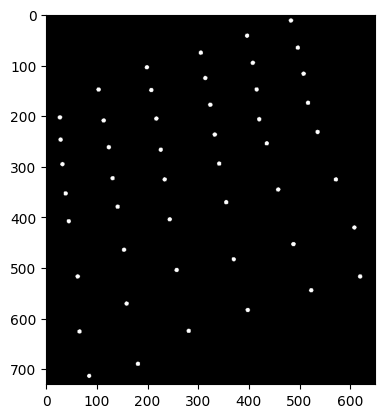

In [9]:
plt.imshow(red2, cmap='gray')

### Machine Learning -- KMeans

We need to know the location of the centers of these dots, in the coordinate space of the picture. the kMeans algorithm is perfect for this. It finds local centers of clusters. I'll get you started with a list of all the pixels that have white centers. The KMeans algorithm will determine all the centers and list them for you as coorindate pairs. You should tell it how many centers you're looking for. Then create a plot with (a) the original image and (b) the centers plotted as white 'x' symbols (look at plt.scatter(marker = ...))

In [20]:
from sklearn.cluster import KMeans

# Extract the coordinates of the white pixels (where red == 255)
white_pixels = np.column_stack(np.where(red2 == 255))
white_pixels

array([[  8, 482],
       [  9, 480],
       [  9, 481],
       ...,
       [717,  84],
       [717,  85],
       [717,  86]])

[[247.29310345  28.29310345]
 [207.13793103 419.5       ]
 [504.52631579 256.92982456]
 [517.29310345 618.29310345]
 [267.25       225.57142857]
 [713.43396226  84.54716981]
 [ 42.25       395.57142857]
 [325.85714286 570.53571429]
 [483.38888889 369.38888889]
 [464.57142857 153.25      ]
 [149.52631579 206.92982456]
 [ 65.85714286 495.53571429]
 [125.82142857 313.32142857]
 [370.78947368 354.49122807]
 [379.625      140.625     ]
 [174.625      515.625     ]
 [544.52631579 521.92982456]
 [237.31034483 331.96551724]
 [353.5         38.28571429]
 [209.56140351 113.1754386 ]
 [517.31034483  61.96551724]
 [624.625      280.625     ]
 [453.47457627 486.93220339]
 [570.82142857 158.32142857]
 [583.47368421 396.92982456]
 [345.78947368 456.87719298]
 [404.57142857 243.25      ]
 [689.625      180.625     ]
 [420.73214286 606.92857143]
 [ 12.31034483 481.96551724]
 [148.32727273 414.43636364]
 [625.85714286  65.53571429]
 [148.5        103.13793103]
 [325.82142857 233.32142857]
 [232.21052632

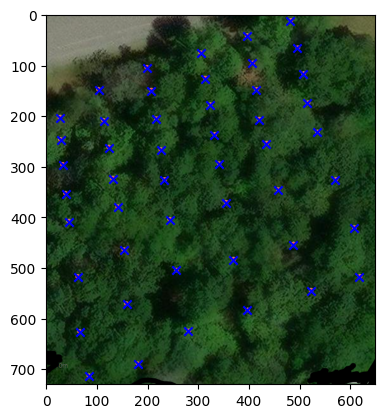

In [21]:
kmeans = KMeans(n_clusters=48, random_state = 1)
kmeans.fit(white_pixels)

centroids = kmeans.cluster_centers_
print(centroids)
# Apply KMeans to find the centers of the white dots
y, x = zip(*centroids)
plt.imshow(picrgb)
plt.scatter(x, y, marker='x', color='b')
plt.show()

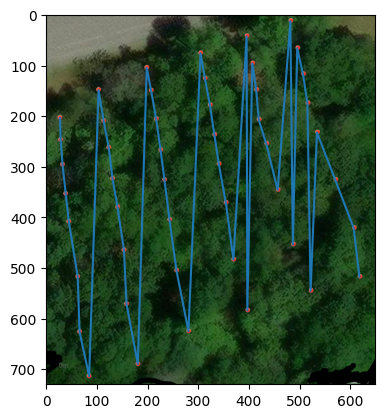

In [25]:
points = centroids
# Sort the points and organize them in order of column
sp = np.array(sorted(points, key=lambda p: (p[1], p[0])))

sorted_points = []
for i in range(48):
    row = []
    row.append(sp[i])
    if len(row) >= 6:
        sorted_points.append(row)
        row = []
y, x = zip(*sp)
plt.plot(x, y)
plt.imshow(picrgb);
plt.show()

In [36]:
df = pd.read_csv("data/code_to_sensor.csv")
x = df.x
y = df.y
df

,Code,x,y
0,A1,26.932203,203.474576
1,A2,28.293103,247.293104
2,A3,31.928571,295.732143
3,A4,38.285714,353.500000
4,A5,44.436364,408.327273
5,A6,61.965517,517.310345
6,A7,65.535714,625.857143
7,A8,84.547170,713.433962
8,B1,103.137931,148.500000
9,B2,113.175439,209.561404


In [43]:
def get_coord(code):
    df2 = df[df.Code == code]
    return df2.x.iloc[0], df2.y.iloc[0]
get_coord("A1")

(np.float64(26.93220339), np.float64(203.4745763))

In [52]:
def get_extents():
    y, x, z = picrgb.shape
    return x, y
get_extents()

(650, 730)

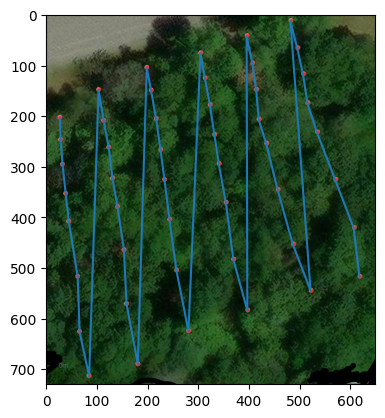

In [35]:
plt.plot(x, y)
plt.imshow(picrgb);
plt.show()

## Part 2: Ingesting Data

Use pandas to read spreadsheet csv files into data frames. You will probably want to merge frames to get one big one. Then think about how to filter or aggregate the data so it's ready to go when someone asks for a location and time -- you should give it to them. (Assume their input is valid at first, but then handle the case when it isn't)

## Part 3: Visualization

Read up on matplotlib 3d plotting. There are four different things here
* 3d plots and contour plots (related)
* animation
* animation with 3d plots
* saving the animation as a file

Thare are plenty of tutorials on saving a simple 2d animation. I'd do that first. Then play around with 3d contour and surface plots. Finally try to get an exported video of a 3d animation. (you might need ffmpeg, it's easy to install on the unix side of WSL)

The goal here is to be able to take grids of data (x,y,t,z) corresponding to location and time and an output like temperature, and plot that as a 3d surface and/or contour and then animate it for a range of times.